In [2]:
from __future__ import unicode_literals, print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils import data
from torch.autograd import Variable
import warnings
import kornia
import radialProfile
from pathlib import Path
import glob
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
# u = torch.load("Results/Results_64/U.pt")
# cnn = torch.load("Results/Results_64/ResNet.pt")
# convlstm = torch.load("Results/Results_64/ConvLSTM.pt")
# sst = torch.load("Results/Results_64/SST.pt")
# dhpm = torch.load("Results/Results_64/DHPM.pt")
# gan = torch.load("Results/Results_64/GAN.pt")
# tf = torch.load("Results/Results_64/TF.pt")
# tf_con = torch.load("Results/Results_64/TF_con.pt")

def load_and_delete_pred(f):
    temp = torch.load(f)
    torch.save({"loss_curve": temp['loss_curve']}, f, pickle_protocol=5)
    return temp['loss_curve']

def get_files(files, thresh):
    if type(files) != list:
        files = [files]
    if not len(files):
        raise ValueError("Empty files")
    d = []
    _len=0
    for i, f in enumerate(files):
        temp = load_and_delete_pred(f)
        _len = len(temp)
        if temp[-1]>thresh:
            print(f"dropping {f}, diverged!")
        else:
            print("done ", f)
            d.append(temp)
    d = np.vstack(d) if len(d) else np.array([[0]*_len])
    return d.mean(axis=0), d.std(axis=0)

check_seed = lambda x, _seeds: -1 in seeds or (int(x.rsplit("_", 1)[1]) in _seeds)




# ============================================================== rbc_data =============================================================

SEEDS = [17,19,41,43,53]
beta = 4503.7119
thresh = float('inf')
files = [
        "tfnet", 
        # "tfnet_--dnsn_noise_4", 
        # "lya_m_0.09",
        # "lya_coef2_1_m_learnt", 
        # "lya_coef2_1_m_learnt_s_10",
        # "lya_coef2_1_m_learnt_s_learnt_s_init_100",
        "tfnet_mask",
        "tfnet_mask_15_70_70_100_150",
        "tfnet_mask_15_50_80_100_100_16",
        # "tfnet_mask_100",
        ]


# files = ["tfnet_outln_8"]

# ============================================================= data5===========================================================================

# SEEDS = [19,97,7,17,132,151]
# beta = 0.1367
# thresh = 50
# files = [   
#             "tfnet_data5_offset--dnsn_noise_4",
#             "tfnet_data5_offset--dnsn_noise_4_wt_d_1e-5_enc_3",
#             # "lya_data5_coef2_1_m_0.2_offset--dnsn_noise_4_wt_d_1e-5_enc_3",
#             # "lya_data5_coef2_1_m_0.1_offset--dnsn_noise_4_wt_d_1e-5_enc_3",
#             # "lya_data5_coef2_1_m_0.3_offset--dnsn_noise_4_wt_d_1e-5_enc_3",
#             # "lya_data5_coef2_1_m_0.5_offset--dnsn_noise_4_wt_d_1e-5_enc_3",
#             # "lya_data5_coef2_1_m_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_3",
#             # "lya_data5_coef2_1_m_learnt_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_2",
#             "lya_data5_coef2_1_m_learnt_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_0",
#             # "lya_data5_coef2_1_m_learnt_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_3_s_10",
#             # "lya_data5_coef2_1_m_learnt_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_3_s_100",
#             # "lya_data5_coef2_1_m_learnt_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_3_s_200",
#             "lya_data5_coef2_1_m_learnt_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_3_s_150",
#         ]

# # files = ["lya_data5_coef2_1_m_learnt_0.4_offset--dnsn_noise_4_wt_d_1e-5_enc_3_s_150"]
# # files=["tfnet_data5_offset--dnsn_noise_4_wt_d_1e-5_enc_3"]

# ============================================================= data9_101===========================================================================

# SEEDS = [17,19,41,43,47,53]
# SEEDS = [17,19,41,43]
# beta = 2.3853
# thresh = float('inf')

# # files=[
# #        "lya_data9_101_coef2_1_m_learnt_0.4_offset--dnsn_noise_2_wt_d_4e-4_enc_0_s_150",
# #     #    "lya_data9_101_coef2_1_m_learnt_0.3_offset--dnsn_noise_2_wt_d_4e-4_enc_0_s_150",
# #     #    "lya_data9_101_coef2_1_m_learnt_0.2_offset--dnsn_noise_2_wt_d_4e-4_enc_0_s_150",
# #     #    "lya_data9_101_coef2_1_m_learnt_0.1_offset--dnsn_noise_2_wt_d_4e-4_enc_0_s_150",
# #     #    "lya_data9_101_coef2_1_m_learnt_0.5_offset--dnsn_noise_2_wt_d_4e-4_enc_0_s_150",
# #         "tfnet_data9_101_offset--dnsn_noise_2_wt_d_4e-4_enc_0",
# #        ]

# files=[
#         "tfnet_data9_101",
#         "tfnet_data9_101_mask_100",
#     #    "lya_data9_101_coef2_1_m_learnt_0.4_s_150",
#        ]

# ============================================================= data21_101===========================================================================

# SEEDS = [17,19,41,43]
# beta = 3.3261
# thresh = float('inf')

# files=["tfnet_data21_101",
#     #    "lya_data21_101_coef2_1_m_learnt_0.4_s_150",
#     #    "lya_data21_101_coef2_1_m_learnt_0.35_s_150",
#     #    "lya_data21_101_coef2_1_m_learnt_0.3_s_150",
#     #    "lya_data21_101_coef2_1_m_learnt_0.2_s_150",
#     #    "lya_data21_101_coef2_1_m_learnt_0.1_s_150",
       

#         "tfnet_data21_101--dnsn_noise_4",
#     #    "lya_data21_101_coef2_1_m_learnt_0.4_s_150--dnsn_noise_4",
#     #    "lya_data21_101_coef2_1_m_learnt_0.3_s_150--dnsn_noise_4",
#     #    "lya_data21_101_coef2_1_m_learnt_0.2_s_150--dnsn_noise_4",
#     #    "lya_data21_101_coef2_1_m_learnt_0.1_s_150--dnsn_noise_4",
#        ]

# ============================================================= fill graph ===========================================================================

# [-1], if all seeds
test = ''
seeds = SEEDS 
remove_seeds = []
seeds = [i for i in seeds if i not in remove_seeds]
graphs={}
if len(files) > 1:
    for k in files:
        v = list(glob.glob("../results/" + k + "/*"))
        v = [i + f"/results{test}.pt" for i in v if check_seed(i, seeds)]
        graphs[k] = get_files(v, thresh)
else:
    for v in glob.glob("../results/" + files[0] + "/*"):
        k = Path(v).name
        if check_seed(v, seeds):
            graphs[k] = get_files(v + f"/results{test}.pt", thresh)



done  ../results/tfnet/tfnet_17/results.pt
done  ../results/tfnet/tfnet_41/results.pt
done  ../results/tfnet/tfnet_19/results.pt
done  ../results/tfnet/tfnet_53/results.pt
done  ../results/tfnet/tfnet_43/results.pt
done  ../results/tfnet_mask/tfnet_mask_19/results.pt
done  ../results/tfnet_mask/tfnet_mask_41/results.pt
done  ../results/tfnet_mask/tfnet_mask_17/results.pt
done  ../results/tfnet_mask/tfnet_mask_43/results.pt
done  ../results/tfnet_mask/tfnet_mask_53/results.pt
done  ../results/tfnet_mask_15_70_70_100_150/tfnet_mask_15_70_70_100_150_17/results.pt
done  ../results/tfnet_mask_15_70_70_100_150/tfnet_mask_15_70_70_100_150_41/results.pt
done  ../results/tfnet_mask_15_70_70_100_150/tfnet_mask_15_70_70_100_150_53/results.pt
done  ../results/tfnet_mask_15_70_70_100_150/tfnet_mask_15_70_70_100_150_43/results.pt
done  ../results/tfnet_mask_15_70_70_100_150/tfnet_mask_15_70_70_100_150_19/results.pt
done  ../results/tfnet_mask_15_50_80_100_100_16/tfnet_mask_15_50_80_100_100_16_17/res

In [19]:
# colors = ["k", "tab:orange", "tab:blue", "tab:red", "tab:green", "tab:purple", "tab:brown", "tab:grey", "tab:pink"]
# title = ["Target", "Con TF-net", "TF-net", "U_net",  "GAN",  "ResNet", "ConvLSTM",  "SST",  "DHPM"]#"U_con",
markers = ["1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d",".",",","o","v","^","<",">","|","_",0,1,2,3,4,5,6,7,8,9,10,11]

# preds = [gan["trues"]*stds+avg, tf_con["preds"]*stds+avg, tf["preds"]*stds+avg, u["preds"]*stds+avg,  gan["preds"]*stds+avg,
#          cnn["preds"]*stds+avg, convlstm["preds"]*stds+avg, sst["preds"]*stds+avg, dhpm["preds"]*stds+avg]

### RMSE vs. Prediction Steps

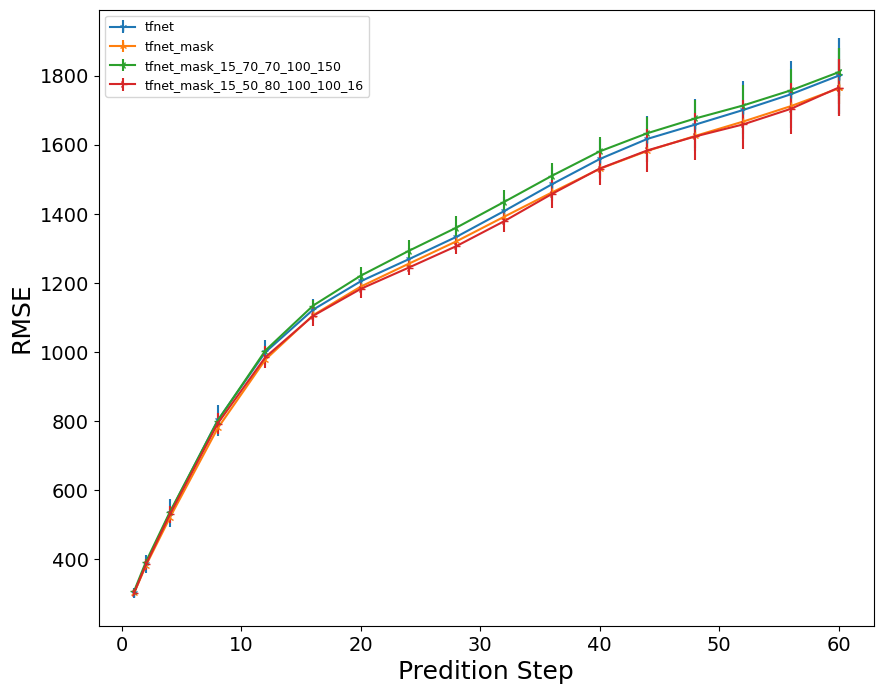

In [20]:
fig=plt.figure(figsize=(10, 8))
idx = np.array([0,1] + list(range(3,60,4))+[59])
# idx = np.array([0,1] + list(range(3,10,)))
# plt.plot(idx+1, tf_con['loss_curve'][idx]*stds, label = "Con TF-net", marker=markers[1], linewidth = 1.5, color = colors[1])
# plt.plot(idx+1,  tf['loss_curve'][idx]*stds, label = "TF-net", marker=markers[2], linewidth = 3, color = colors[2])
# plt.plot(idx+1, u['loss_curve'][idx]*stds, label = "U_net", marker=markers[3], linewidth = 1.5, color = colors[3])
# plt.plot(idx+1, gan['loss_curve'][idx]*stds, label = "GAN", marker=markers[4], linewidth = 1.5, color = colors[4])
# plt.plot(idx+1, cnn['loss_curve'][idx]*stds, label = "ResNet", marker= markers[5], linewidth = 1.5, color = colors[5])
# plt.plot(idx+1, convlstm['loss_curve'][idx]*stds, label = "ConvLSTM", marker= markers[6], linewidth = 1.5, color = colors[6])
# plt.plot(idx+1, sst['loss_curve'][idx]*stds, label = "SST", marker= markers[7], linewidth = 1.5, color = colors[7])
# plt.plot(idx+1, dhpm['loss_curve'][idx]*stds, label = "DHPM", marker=markers[8], linewidth = 1.5, color = colors[8])

for i,v in enumerate(graphs.items()):
    k,v=v
    plt.errorbar(idx+1, v[0][idx]*beta, v[1][idx]*beta, label = k, linewidth = 1.5, marker=markers[i])


plt.ylabel("RMSE", size = 18)
plt.xlabel("Predition Step", size = 18)
plt.legend(fontsize=9)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("rmse_horizon.png", dpi = 400, bbox_inches = 'tight')
plt.show()

In [53]:
0.077*0.1367

0.0105259

In [155]:
# import glob as glob
# from pathlib import Path
# import os
# import shutil
# for f in glob.glob("../results/*_offset_*/"):
    # parent = Path(f).parent.name
    # dst = "../results/" + parent.rsplit("_",1)[0] + "/"
    # print(dst, parent)
    # # os.makedirs(dst, exist_ok=True)
    # shutil.copytree(f, dst + parent)
    # shutil.rmtree(f)

### Kinetic Energy

In [13]:
def inverse_seqs(tensor):
    tensor = tensor.reshape(-1,7, 60, 2, 64, 64)
    tensor = tensor.transpose(0,2,3,1,4,5)
    tensor = tensor.transpose(0,1,2,4,3,5).reshape(-1, 60, 2, 64, 448)
    tensor = tensor.transpose(0,2,1,3,4)
    return tensor

def TKE(preds):
    mean_flow = np.expand_dims(np.mean(preds, axis = 1), axis = 1)
    tur_preds = np.mean((preds - mean_flow)**2, axis = 1)
    tke = (tur_preds[0] + tur_preds[1])/2
    return tke

def tke2spectrum(tke):
    """Convert TKE field to spectrum"""
    sp = np.fft.fft2(tke)
    sp = np.fft.fftshift(sp)
    sp = np.real(sp*np.conjugate(sp))
    sp1D = radialProfile.azimuthalAverage(sp)
    return sp1D 

def spectrum_band(tensor):
    tensor = inverse_seqs(tensor)
    spec = np.array([tke2spectrum(TKE(tensor[i])) for i in range(tensor.shape[0])])
    return np.mean(spec, axis = 0), np.std(spec, axis = 0)

def inverse_seqs(tensor):
    tensor = tensor.reshape(-1,7, 60, 2, 64, 64)
    tensor = tensor.transpose(0,2,3,1,4,5)
    tensor = tensor.transpose(0,1,2,4,3,5).reshape(-1, 60, 2, 64, 448)
    tensor = tensor.transpose(0,2,1,3,4)
    return tensor

def TKE_mean(tensor):
    if tensor.shape[-1] == 448:
        return TKE(tensor)
    tensor = inverse_seqs(tensor)
    tke_mean = 0
    for i in range(0,min(70,tensor.shape[0])):
        tke_mean += TKE(tensor[i])
    tke_mean = tke_mean/tensor.shape[0]
    return tke_mean

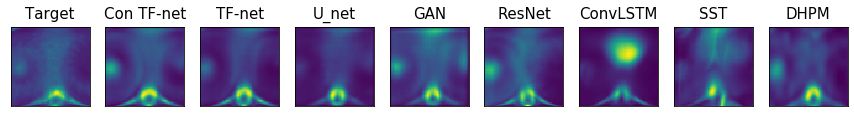

In [15]:
tkes = [TKE_mean(preds[i]) for i in range(9)]
title = ["Target","Con TF-net", "TF-net", "U_net",  "GAN",  "ResNet", "ConvLSTM",  "SST",  "DHPM"]
fig=plt.figure(figsize=(15, 5))
columns = 9
rows = 1
for i in range(columns):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(tkes[i][:64,:64])
    plt.xlabel(title[i], size = 15, rotation=0, labelpad = -100)
    plt.xticks([])
    plt.yticks([])
plt.savefig("Kinetic Energy.png", dpi = 400,bbox_inches = 'tight')
plt.show()

### Divergence 

In [16]:
def divergence(preds):
    #preds: batch_size*output_steps*2*H*W
    preds_u = preds[:,:,0]
    preds_v = preds[:,:,1]
    u = torch.from_numpy(preds_u).float().to(device)
    v = torch.from_numpy(preds_v).float().to(device)
    #Sobolev gradients
    field_grad = kornia.filters.SpatialGradient()
    u_x = field_grad(u)[:,:,0]
    v_y = field_grad(v)[:,:,1]
    div = np.mean(np.abs((v_y + u_x).cpu().data.numpy()), axis = (0,2,3))
    return div

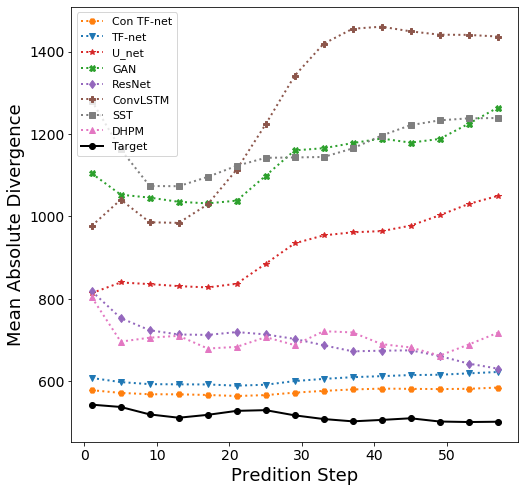

In [21]:
dhpm_preds = np.expand_dims(dhpm["preds"].transpose(1,0,2,3), axis = 0)
divs = [divergence(preds[i]) for i in range(9)]
linestyles = ['-', '--', '-.', ':','-.', '--', '-.', ':','-.','--']
fig=plt.figure(figsize=(8, 8))
idx = np.array(list(range(0,60,4)))
for i in range(1, len(markers)):
    plt.plot(idx+1, divs[i][idx], label = title[i], marker=markers[i], linewidth = 2, linestyle=':', color = colors[i])  
plt.plot(idx+1, divs[0][idx], label = title[0], marker=markers[0], linewidth = 2, linestyle=linestyles[0], color = 'k')

plt.ylabel("Mean Absolute Divergence", size = 18)
plt.xlabel("Predition Step", size = 18)
plt.legend(fontsize=11)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("divergence.png", dpi = 400, bbox_inches = 'tight')
plt.show()

### Energy Spectrum

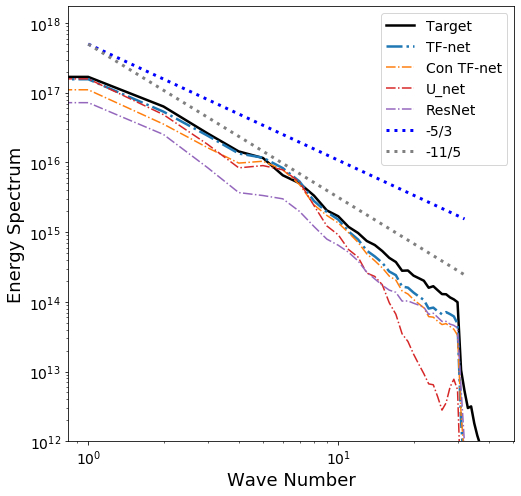

In [28]:
def inverse_seqs(tensor):
    tensor = tensor.reshape(-1,7, 60, 2, 64, 64)
    tensor = tensor.transpose(0,2,3,1,4,5)
    tensor = tensor.transpose(0,1,2,4,3,5).reshape(-1, 60, 2, 64, 448)
    tensor = tensor[:,:,:,:,:64]
    tensor = tensor.transpose(0,2,1,3,4)
    return tensor

fig=plt.figure(figsize=(8, 8))
spec_mean, spec_stds = spectrum_band(preds[0])
x_idx = np.array(list(range(0,len(spec_mean))))
plt.plot(x_idx, spec_mean[x_idx], label = title[0], linewidth = 2.5, color = "k")

spec_mean, spec_stds = spectrum_band(preds[1])
plt.plot(x_idx, spec_mean[x_idx], label = title[2], linewidth = 2.5, color = colors[2], linestyle='-.')

spec_mean, spec_stds = spectrum_band(preds[2])
plt.plot(x_idx, spec_mean[x_idx], label = title[1], linewidth = 1.5, color = colors[1], linestyle='-.')

spec_mean, spec_stds = spectrum_band(preds[3])
plt.plot(x_idx, spec_mean[x_idx], label = title[3],linewidth = 1.5, color = colors[3], linestyle='-.' )

spec_mean, spec_stds = spectrum_band(preds[5])
plt.plot(x_idx, spec_mean[x_idx], label = title[5], linewidth = 1.5, color = colors[5], linestyle='-.')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale("log")
plt.xscale("log")
x_idx = np.linspace(0,5,100)
x = 2**x_idx
y = 2**(-5*x_idx/3 + np.log2(5*10e16))
plt.plot(x, y, ':b', label='-5/3',linewidth = 3)

x_idx = np.linspace(0,5,100)
x = 2**x_idx
y = 2**(-11*x_idx/5 + np.log2(5*10e16))
plt.plot(x, y, ':', label='-11/5',linewidth = 3, color = "grey")

plt.legend(fontsize=14, loc = 1)
plt.ylabel("Energy Spectrum", size = 18)
plt.xlabel("Wave Number", size = 18)
plt.ylim(10e11, )
plt.savefig("spec_ci_entire.png", dpi = 400, bbox_inches = 'tight')

Text(0.5, 0, 'Wave Number')

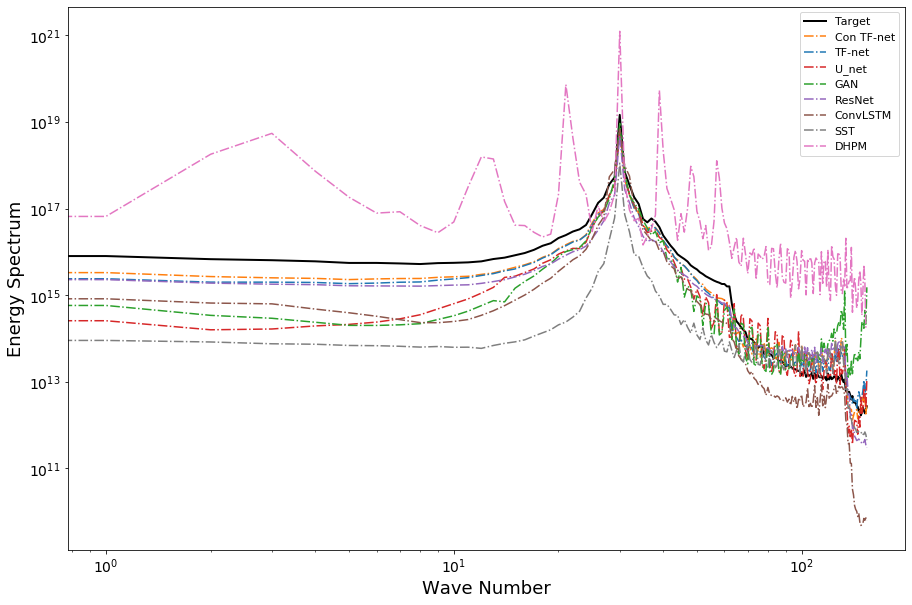

In [31]:
def inverse_seqs(tensor):
    tensor = tensor.reshape(-1,7, 60, 2, 64, 64)
    tensor = tensor.transpose(0,2,3,1,4,5)
    tensor = tensor.transpose(0,1,2,4,3,5).reshape(-1, 60, 2, 64, 448)
    tensor = tensor.transpose(0,2,1,3,4)
    return tensor

fig=plt.figure(figsize=(15, 10))
x_idx = np.array(list(range(0,155)))

spec_mean, spec_stds = spectrum_band(preds[0])
plt.plot(x_idx, spec_mean[x_idx], label = title[0], linewidth = 2, color = "k")

for i in range(1, 9):
    spec_mean, spec_stds = spectrum_band(preds[i])
    plt.plot(x_idx, spec_mean[x_idx], label = title[i], linewidth = 1.5, color = colors[i], linestyle='-.')

plt.legend(fontsize=11, loc = 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Energy Spectrum", size = 18)
plt.xlabel("Wave Number", size = 18)
#plt.savefig("spec_ci_all.png", dpi = 400, bbox_inches = 'tight')

### Visualization

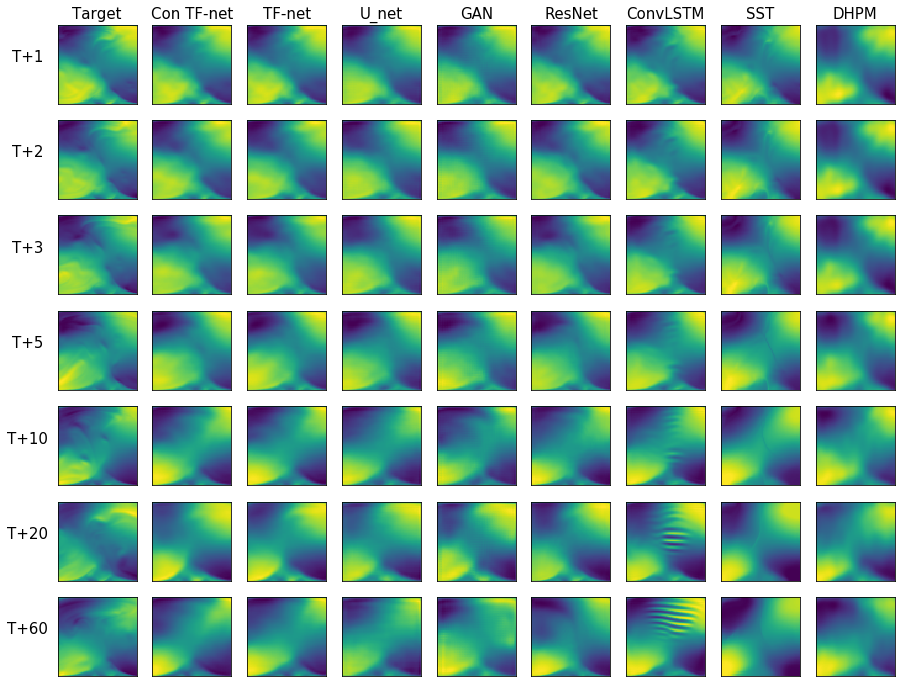

In [35]:
index = 0
direc = 0
timesteps = [0,1,2, 4,9,19,59]
fig=plt.figure(figsize=(15, 12))
columns = 9
rows = 7
for i in range(1, rows+1):
    for j in range(1, columns+1):
        fig.add_subplot(rows, columns, (i-1)*columns+j)
        if j == 9:
             plt.imshow(preds[j-1][direc,timesteps[i-1],:64,:64])
        else:
            if j == 1:
                plt.imshow(preds[j-1][index][timesteps[i-1],direc])
                plt.ylabel("T+"+str(timesteps[i-1]+1), size = 15 ,rotation=0, labelpad=30)
            else:
                plt.imshow(preds[j-1][index][timesteps[i-1],direc])
        
        if i == 1:
            plt.title(title[j-1], size = 15)
        plt.xticks([])
        plt.yticks([])
plt.savefig("velocity_u.png", dpi = 400, bbox_inches = 'tight')
plt.show()

## Videos

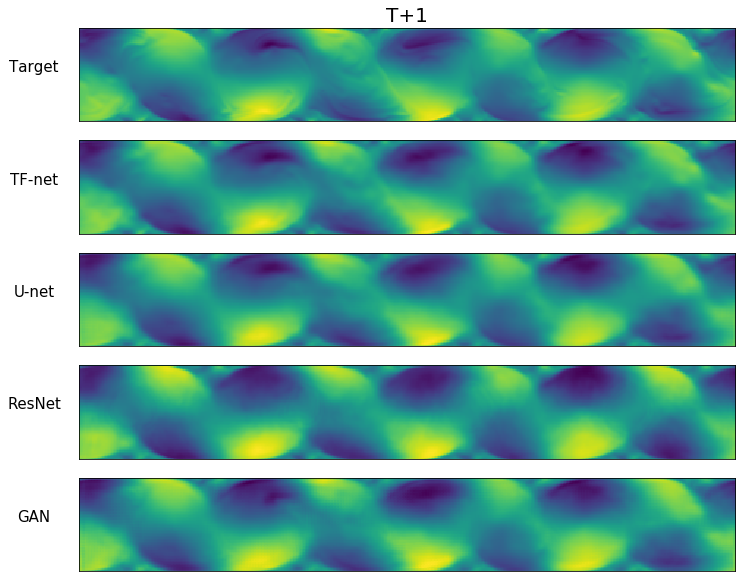

In [6]:
direc = "/global/cscratch1/sd/rwang2/TF-net/Evaluation/Videos/Videos_Entire_Domain/"
Target = torch.load(direc + "TF.pt")["trues"]
TF = torch.load(direc + "TF.pt")["preds"]
U = torch.load(direc +"U.pt")["preds"]
ResNet = torch.load(direc +"ResNet.pt")["preds"]
GAN = torch.load(direc +"GAN.pt")["preds"]

preds = [Target,  TF,  U,  ResNet, GAN]
index = 0
direc = 0
rows = 5
ylabels = ["Target", "TF-net", "U-net", "ResNet", "GAN"]
fig=plt.figure(figsize=(15, 10))

for timesteps in range(60):
    for i in range(1, rows+1):
        fig.add_subplot(rows, 1, i)
        plt.imshow(preds[i-1][index][timesteps, direc])
        plt.ylabel(ylabels[i-1], size = 15 ,rotation=0, labelpad=45)
        if i == 1:
            plt.title("T+"+str(timesteps+1), size = 20)
        plt.xticks([])
        plt.yticks([])
    break
    """
    if timesteps < 10:
        plt.savefig('/global/cscratch1/sd/rwang2/TF-net/TF-net/Entire_Domain/Imgs/im_' + str(0) + str(timesteps) + ".png", 
                         dpi = 400, bbox_inches = 'tight')
    else:
        plt.savefig('/global/cscratch1/sd/rwang2/TF-net/TF-net/Entire_Domain/Imgs/im_' + str(timesteps) + ".png", 
                        dpi = 400, bbox_inches = 'tight')
    """